# **AIM:-** Image Classification of Custom-Images using Deep-Learning

# **Theory:-**

This experiment is about image classification using a technique called deep learning. Deep learning uses artificial neural networks with multiple layers to extract higher-level features from data.

* Image Classification: The goal is to train a model to categorize
images into predefined classes (cats and dogs in this case).
* Deep Learning: A subfield of machine learning that uses artificial neural networks with multiple layers to analyze data and extract increasingly complex features.
* Convolutional Neural Networks (CNNs): Specialized neural networks designed for processing image data. They employ convolutional layers to detect patterns and features within images.

### How CNNs Work:

* Convolutional Layers: Apply filters (kernels) to the input image to extract features like edges, corners, and textures.
* Pooling Layers: Reduce the spatial dimensions of the feature maps, decreasing computational complexity and providing some translation invariance.
* Fully Connected Layers: Connect all neurons from the previous layers to learn non-linear combinations of features and perform classification.


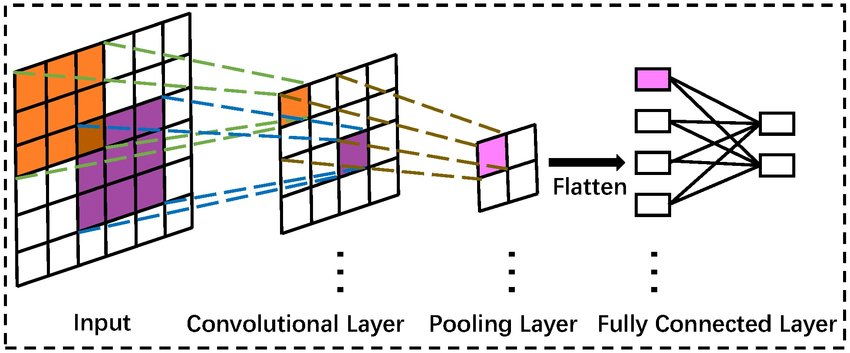

# **Code:**

In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image
import os
import glob

In [127]:
folder_path1 = 'C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/train/CAT'
folder_path2 = 'C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/train/DOG'
folder_path3 = 'C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/test/CAT'
folder_path4 = 'C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/test/DOG'

In [128]:
cat_train_img = glob.glob(os.path.join(folder_path1,'*.jpg'))
dog_train_img = glob.glob(os.path.join(folder_path2,'*.jpg'))
cat_test_img = glob.glob(os.path.join(folder_path3,'*.jpg'))
dog_test_img = glob.glob(os.path.join(folder_path4,'*.jpg'))

In [129]:
cat_train_img = len(cat_train_img)
dog_train_img = len(dog_train_img)
cat_test_img = len(cat_test_img)
dog_test_img = len(dog_test_img)

In [130]:
print(f'cat_train_img = {cat_train_img}')
print(f'dog_train_img = {dog_train_img}')
print(f'cat_test_img = {cat_test_img}')
print(f'dog_test_img = {dog_test_img}')

cat_train_img = 9371
dog_train_img = 9372
cat_test_img = 3126
dog_test_img = 3125


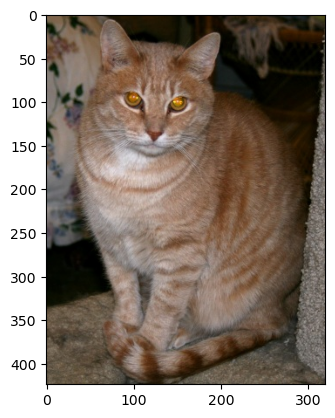

In [131]:
cat4 = cv2.imread("C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/test/CAT/10020.jpg")
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [133]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/225,
                               shear_range=0.2,
                               zoom_range =0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

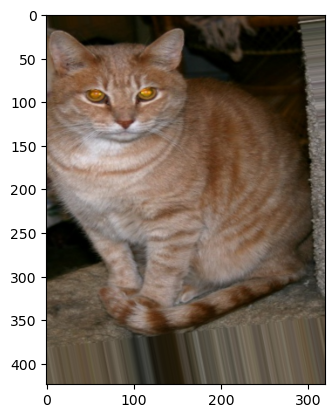

In [134]:
plt.imshow(image_gen.random_transform(cat4))

In [135]:
image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [136]:
image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [137]:
image_shape = (150,150,3)

In [138]:
image_shape[:2]

(150, 150)

In [139]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [140]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
batch_size =16
train_image_gen = image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size =batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [143]:
test_image_gen = image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size =batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [146]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=2,restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model_1.keras',monitor='val_accuracy',verbose=2,save_best_only=True)

In [147]:
results = model.fit(train_image_gen, epochs = 15, validation_data=test_image_gen,callbacks=[early_stop,model_checkpoint])

Epoch 1/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5523 - loss: 0.8081
Epoch 1: val_accuracy improved from -inf to 0.59878, saving model to best_model_1.keras
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 272s 230ms/step - accuracy: 0.5524 - loss: 0.8080 - val_accuracy: 0.5988 - val_loss: 0.6634
Epoch 2/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6215 - loss: 0.6557
Epoch 2: val_accuracy improved from 0.59878 to 0.66245, saving model to best_model_1.keras
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 257s 219ms/step - accuracy: 0.6215 - loss: 0.6557 - val_accuracy: 0.6625 - val_loss: 0.6129
Epoch 3/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6770 - loss: 0.5987
Epoch 3: val_accuracy improved from 0.66245 to 0.70613, saving model to best_model_1.keras
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 257s 219ms/step - accuracy: 0.6770 - loss: 0.5987 - val_accuracy: 0.7061 - val_loss: 0.5657
Epoch 4/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7022 - loss: 0.5734
E

In [148]:
model.evaluate(train_image_gen)

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 132s 112ms/step - accuracy: 0.7951 - loss: 0.4407


[0.44819414615631104, 0.7922958135604858]

In [149]:
model.evaluate(test_image_gen)

391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.7877 - loss: 0.4523


[0.45911648869514465, 0.7830747365951538]

In [150]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

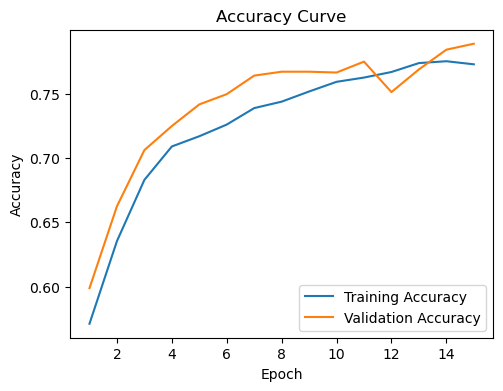

In [151]:
trained_epochs = len(results.history['accuracy'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,trained_epochs+1), accuracy, label='Training Accuracy')
plt.plot(range(1,trained_epochs+1),val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [152]:
#model.save()

# **Task:**

Apply CNN for custom image classification on the given Dataset

In [153]:
folder_path5 = 'C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/training_set/homer'
folder_path6 = 'C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/training_set/bart'
folder_path7 = 'C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/test_set/homer'
folder_path8 = 'C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/test_set/bart'

In [154]:
bart_train_img = glob.glob(os.path.join(folder_path5,'*.bmp'))
homer_train_img = glob.glob(os.path.join(folder_path6,'*.bmp'))
bart_test_img = glob.glob(os.path.join(folder_path7,'*.bmp'))
homer_test_img = glob.glob(os.path.join(folder_path8,'*.bmp'))

In [155]:
bart_train_img = len(bart_train_img)
homer_train_img = len(homer_train_img)
bart_test_img = len(bart_test_img)
homer_test_img = len(homer_test_img)

In [156]:
print(f'bart_train_img = {bart_train_img}')
print(f'homer_train_img = {homer_train_img}')
print(f'bart_test_img = {bart_test_img}')
print(f'homer_test_img = {homer_test_img}')

bart_train_img = 83
homer_train_img = 132
bart_test_img = 26
homer_test_img = 28


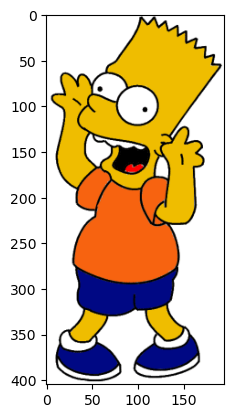

In [157]:
bart = cv2.imread("C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/test_set/bart/bart12.bmp")
bart = cv2.cvtColor(bart, cv2.COLOR_BGR2RGB)
plt.imshow(bart)

In [158]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/225,
                               shear_range=0.2,
                               zoom_range =0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

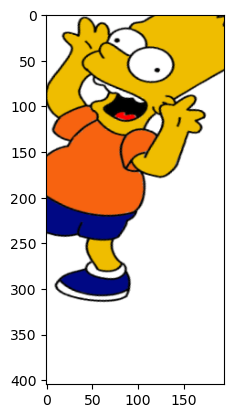

In [159]:
plt.imshow(image_gen.random_transform(bart))

In [160]:
image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/training_set/')

Found 215 images belonging to 2 classes.


In [161]:
image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/test_set/')

Found 54 images belonging to 2 classes.


In [162]:
image_shape

(150, 150, 3)

In [163]:
image_shape[:2]

(150, 150)

In [164]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [165]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=2,restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model_2.keras',monitor='val_accuracy',verbose=2,save_best_only=True)

In [166]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
batch_size =16
train_image_gen = image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/training_set/',
                                               target_size=image_shape[:2],
                                               batch_size =batch_size,
                                                class_mode='binary')

Found 215 images belonging to 2 classes.


In [168]:
batch_size =16
test_image_gen = image_gen.flow_from_directory('C:/Users/priyanshu/Desktop/Exp 11/homer_bart_2/test_set/',
                                               target_size=image_shape[:2],
                                               batch_size =batch_size,
                                                class_mode='binary')

Found 54 images belonging to 2 classes.


In [169]:
results = model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop,model_checkpoint])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5351 - loss: 8.2002
Epoch 1: val_accuracy improved from -inf to 0.81481, saving model to best_model_2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.5397 - loss: 8.0055 - val_accuracy: 0.8148 - val_loss: 0.5379
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6762 - loss: 0.5984
Epoch 2: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.6777 - loss: 0.5968 - val_accuracy: 0.7778 - val_loss: 0.4294
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7817 - loss: 0.5258
Epoch 3: val_accuracy improved from 0.81481 to 0.90741, saving model to best_model_2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.7808 - loss: 0.5252 - val_accuracy: 0.9074 - val_loss: 0.3643
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8218 - loss: 0.4150
Epoch 4: val_accuracy did not improve from 0.90741
14/14 ━━━━━━━━━━━━━━━━━━

In [170]:
model.evaluate(train_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8794 - loss: 0.3642


[0.39066797494888306, 0.8372092843055725]

In [171]:
model.evaluate(test_image_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9287 - loss: 0.2980


[0.300184965133667, 0.9259259104728699]

In [172]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

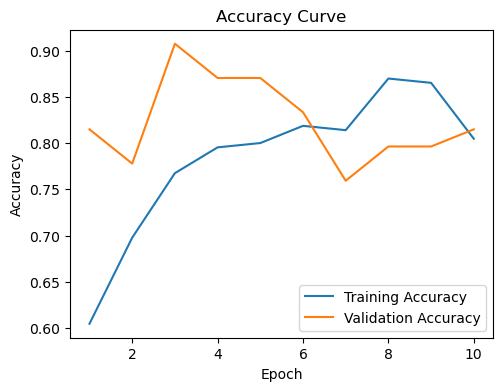

In [173]:
trained_epochs = len(results.history['accuracy'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,trained_epochs+1), accuracy, label='Training Accuracy')
plt.plot(range(1,trained_epochs+1),val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [174]:
#model.save()

# **Conclusion:**
This experiment demonstrated the application of Convolutional Neural Networks (CNNs) for image classification. CNNs are a powerful deep learning technique well-suited for analyzing visual data. By leveraging convolutional layers, pooling layers, and fully connected layers, CNNs can effectively extract features from images and learn patterns for classification.

### **Key Observations:**  
The model achieved a reasonable level of accuracy in classifying images of cats and dogs, as well as Homer and Bart Simpson.* Data augmentation techniques like rotation, shifting, and flipping were used to increase the diversity of the training data and improve the model's generalization ability.* Early stopping and model checkpointing were implemented to prevent overfitting and save the best performing model during training. 

The performance of the model can be further improved by:
  * Increasing the number of epochs or training iterations.
  * Tuning hyperparameters like learning rate, batch size, and network architecture.
  * Using a larger and more diverse dataset.
  * Exploring more advanced CNN architectures.